In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utils.date import convert_to_str_days, convert_days_to_str
from utils.dataloader import load_indirect_WUE, load_carbon, load_direct_WUE

In [2]:
work_time     = 1
start_str     = "2022-08-07T01"
end_date_str  = "2022-08-14T01"

## 1. Onsite water visualization

In [5]:
def batch_visualization(loc_name_list, y1_lim_list, y2_lim_list,
                        y1_step_list, y2_step_list):
    
    for i in range(4):
        loc_name      = loc_name_list[i]


        fuel_mix_path = "data/fuelmix/{}_year_2022.csv".format(loc_name.split("_")[-1])
        weather_path  = "data/weather/{}.csv".format(loc_name)
        dc_loc        = loc_name.split("_")[1]


        start_ts      = convert_to_str_days(start_str)*24  
        end_ts        = convert_to_str_days(end_date_str)*24  + work_time - 1
        num_timeslot  = end_ts - start_ts

        time_array    = np.arange(1, 1+num_timeslot)/24

        # Suppose the datacenter PUE is ~1.1
        indirectWue = load_indirect_WUE(fuel_mix_path, dc_loc) * 1.1
        indirectWue = np.roll(indirectWue, -7)      # UTC to PDT time
        indirectWue = indirectWue[start_ts:end_ts]

        carbon_curve = load_carbon(fuel_mix_path, dc_loc)
        carbon_curve = np.roll(carbon_curve, -7)    # UTC to PDT time
        carbon_curve = carbon_curve[start_ts:end_ts]

        directWue = load_direct_WUE(weather_path)
        directWue = np.roll(directWue, -7)
        directWue = directWue[start_ts:end_ts]

        t = np.arange(24*7)/24
        data1 = directWue
        data2 = carbon_curve

        fig, ax1 = plt.subplots(figsize =(6, 5))

        color = 'tab:blue'
        ax1.set_xlabel('time (s)')
        ax1.set_ylabel('exp', color=color)
        ax1.plot(t, data1, color=color, linewidth=4)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:orange'
        ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color, linewidth=4)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        ax1.set_xticks(np.arange(0,7.1,1),   labels = ["" for i in np.arange(0,7.1,1)],fontsize = 18,fontweight='bold')
        ax1.set_xticks(np.arange(0.5,7,1),   labels = ["Mon", "Tue", "Wed", "THU", "FRI", "SAT", "SUN"],fontsize = 18,fontweight='bold', minor=True, rotation=30)
        ax1.set_xlim([0,7])

        
        y10, y11 = y1_lim_list[i]
        y1_step  = y1_step_list[i]
        ax1.set_yticks(np.arange(y10, y11, y1_step), labels = ["{:.1f}".format(i) for i in np.arange(y10, y11, y1_step) ],
                       fontsize = 18,fontweight='bold')
        ax1.set_ylim([y10, y11])

        ax1.set_ylabel("On-site WUE (L/kWh)", fontweight ='bold', fontsize=20)
        ax1.set_xlabel("Days", fontweight ='bold', fontsize=20)


        y20, y21 = y2_lim_list[i]
        y2_step  = y2_step_list[i]
        
        ax2.set_yticks(np.arange(y20, y21, y2_step), labels = ["{:.2f}".format(i) for i in np.arange(y20, y21, y2_step)],
                       fontsize = 18,fontweight='bold')
        ax2.set_ylim([y20, y21])
        ax2.set_ylabel("Carbon Efficiency (kg/kWh)", fontweight ='bold', fontsize=20)
        # ax2.grid(None)

        ax1.spines['bottom'].set_linewidth(4);
        ax1.spines['left'].set_linewidth(4);
        ax1.spines['right'].set_linewidth(4);
        ax1.spines['top'].set_linewidth(4);

        ax1.grid(which='major', alpha=0.5)
        # plt.title(loc_name)
        # plt.savefig("output/snapshot/{}_wue_carbon_{}.pdf".format(loc_name.split("_")[1], start_str[5:10]), bbox_inches='tight')
        plt.show()
    # plt.plot(carbon_curve)

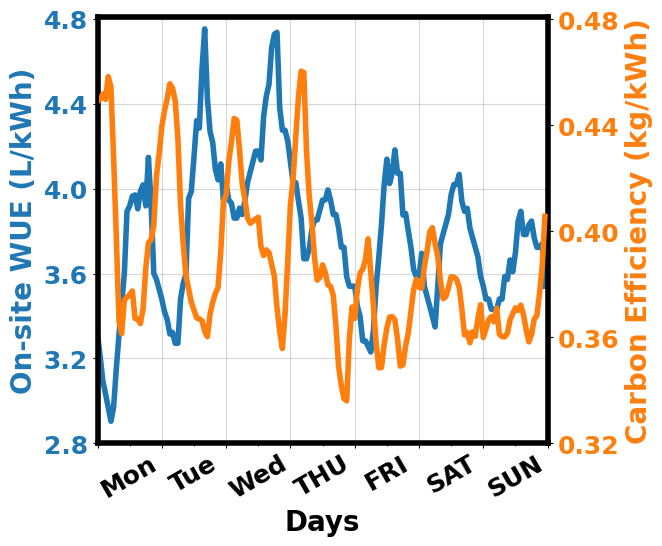

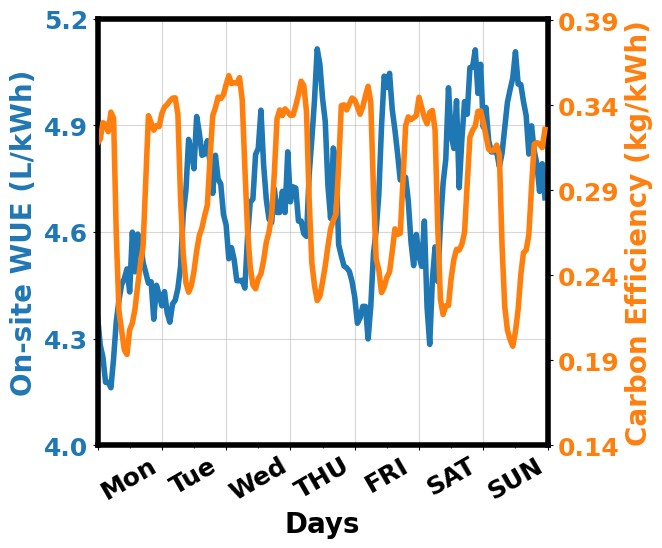

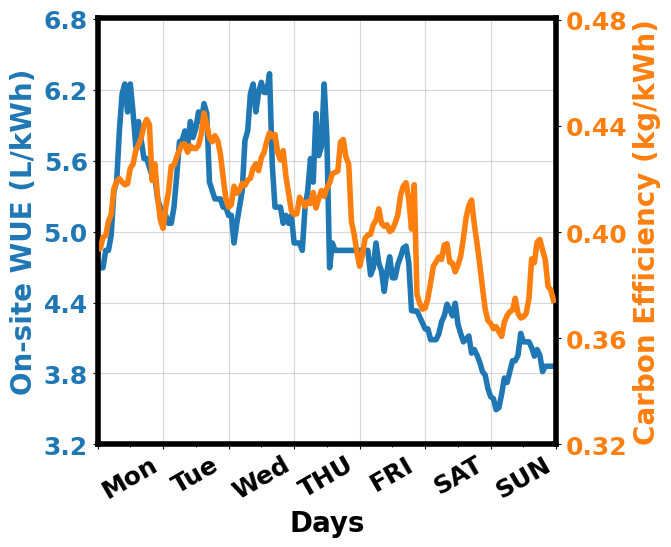

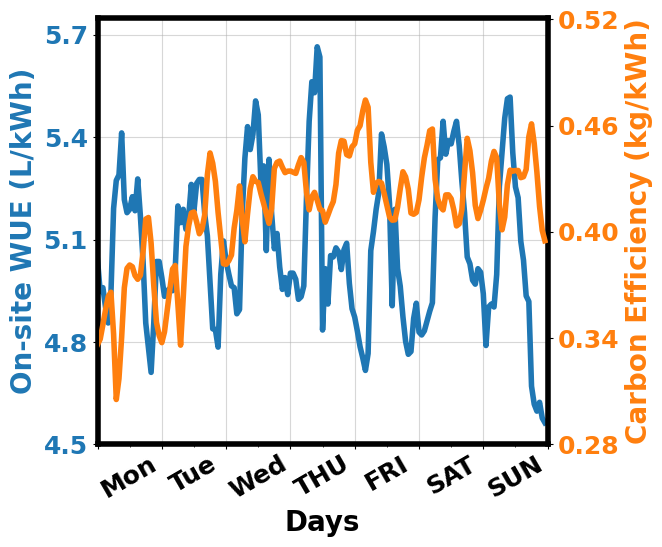

In [6]:
# 4S2_Oregan_NW.csv    HND_Nevada_CAL.csv   JYO_virginia_PJM.csv 
# FTY_Georgia_SE.csv   JWY_Texas_ERCO.csv

loc_name_list = ["4S2_Oregan_NW", "HND_Nevada_CAL", "JYO_virginia_PJM", 
                 "JWY_Texas_ERCO" ]

y1_lim_list = [(2.8, 4.81), (4, 5.2), (3.2, 6.81), (4.5, 5.75)]
y2_lim_list = [(0.32, 0.481), (0.14, 0.391), (0.32, 0.481), (0.28, 0.521)]

y1_step_list = [0.4, 0.3, 0.6, 0.3]
y2_step_list = [0.04, 0.05, 0.04, 0.06]

batch_visualization(loc_name_list, y1_lim_list, y2_lim_list, 
                    y1_step_list, y2_step_list)


## 2. Total Water

In [7]:
def batch_visualization_total(loc_name_list, y1_lim_list, y2_lim_list,
                        y1_step_list, y2_step_list):
    
    for i in range(4):
        loc_name      = loc_name_list[i]


        fuel_mix_path = "data/fuelmix/{}_year_2022.csv".format(loc_name.split("_")[-1])
        weather_path  = "data/weather/{}.csv".format(loc_name)
        dc_loc        = loc_name.split("_")[1]


        start_ts      = convert_to_str_days(start_str)*24  
        end_ts        = convert_to_str_days(end_date_str)*24  + work_time - 1
        num_timeslot  = end_ts - start_ts

        time_array    = np.arange(1, 1+num_timeslot)/24

        # Suppose the datacenter PUE is ~1.1
        indirectWue = load_indirect_WUE(fuel_mix_path, dc_loc) * 1.1
        indirectWue = np.roll(indirectWue, -7)      # UTC to PDT time
        indirectWue = indirectWue[start_ts:end_ts]

        carbon_curve = load_carbon(fuel_mix_path, dc_loc)
        carbon_curve = np.roll(carbon_curve, -7)    # UTC to PDT time
        carbon_curve = carbon_curve[start_ts:end_ts]

        directWue = load_direct_WUE(weather_path)
        directWue = np.roll(directWue, -7)
        directWue = directWue[start_ts:end_ts]

        t = np.arange(24*7)/24
        data1 = directWue + indirectWue
        data2 = carbon_curve

        fig, ax1 = plt.subplots(figsize =(6, 5))

        color = 'tab:blue'
        ax1.set_xlabel('time (s)')
        ax1.set_ylabel('exp', color=color)
        ax1.plot(t, data1, color=color, linewidth=4)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:orange'
        ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color, linewidth=4)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        ax1.set_xticks(np.arange(0,7.1,1),   labels = ["" for i in np.arange(0,7.1,1)],fontsize = 18,fontweight='bold')
        ax1.set_xticks(np.arange(0.5,7,1),   labels = ["Mon", "Tue", "Wed", "THU", "FRI", "SAT", "SUN"],fontsize = 18,fontweight='bold', minor=True, rotation=30)
        ax1.set_xlim([0,7])

        
        y10, y11 = y1_lim_list[i]
        y1_step  = y1_step_list[i]
        ax1.set_yticks(np.arange(y10, y11, y1_step), labels = ["{:.1f}".format(i) for i in np.arange(y10, y11, y1_step) ],
                       fontsize = 18,fontweight='bold')
        ax1.set_ylim([y10, y11])

        ax1.set_ylabel("Total WUE (L/kWh)", fontweight ='bold', fontsize=20)
        ax1.set_xlabel("Days", fontweight ='bold', fontsize=20)


        y20, y21 = y2_lim_list[i]
        y2_step  = y2_step_list[i]
        
        ax2.set_yticks(np.arange(y20, y21, y2_step), labels = ["{:.2f}".format(i) for i in np.arange(y20, y21, y2_step)],
                       fontsize = 18,fontweight='bold')
        ax2.set_ylim([y20, y21])
        ax2.set_ylabel("Carbon Efficiency (kg/kWh)", fontweight ='bold', fontsize=20)
        # ax2.grid(None)

        ax1.spines['bottom'].set_linewidth(4);
        ax1.spines['left'].set_linewidth(4);
        ax1.spines['right'].set_linewidth(4);
        ax1.spines['top'].set_linewidth(4);

        ax1.grid(which='major', alpha=0.5)
        # plt.title(loc_name)
        # plt.savefig("output/snapshot_total/{}_wue_carbon_{}.pdf".format(loc_name.split("_")[1], start_str[5:10]), bbox_inches='tight')
        plt.show()
    # plt.plot(carbon_curve)

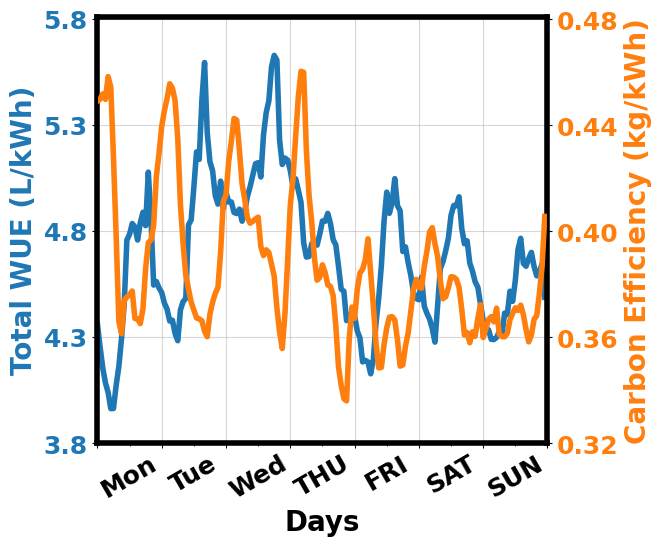

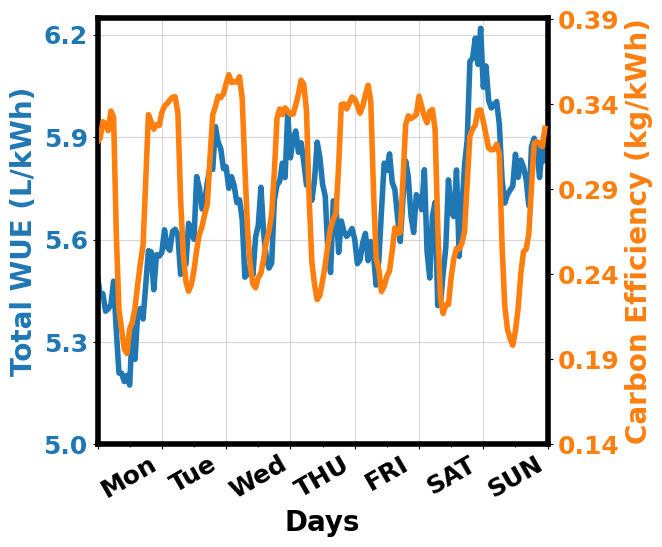

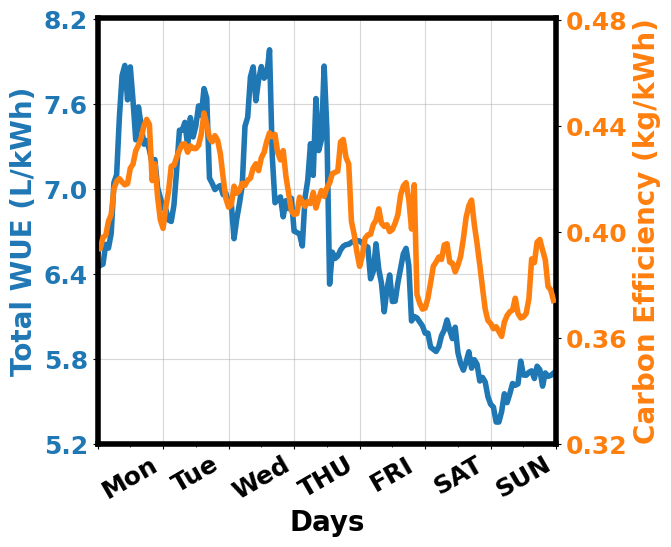

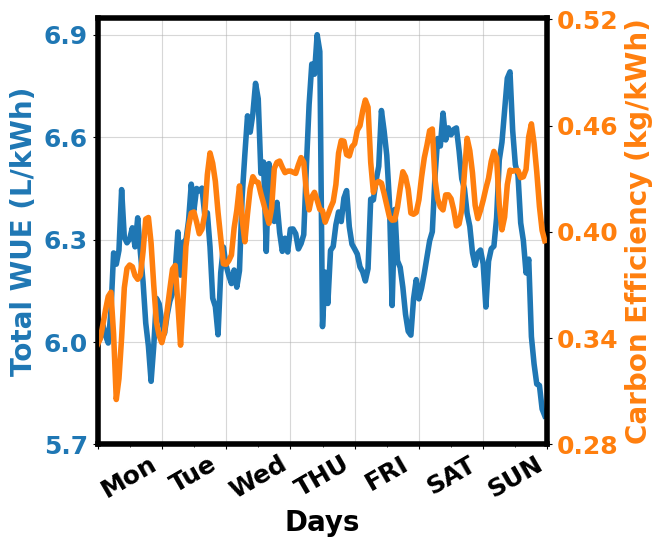

In [8]:
# 4S2_Oregan_NW.csv    HND_Nevada_CAL.csv   JYO_virginia_PJM.csv 
# FTY_Georgia_SE.csv   JWY_Texas_ERCO.csv

loc_name_list = ["4S2_Oregan_NW", "HND_Nevada_CAL", "JYO_virginia_PJM", 
                 "JWY_Texas_ERCO" ]

y1_lim_list = [(3.8, 5.81), (5, 6.25), (5.2, 8.21), (5.7, 6.95)]
y2_lim_list = [(0.32, 0.481), (0.14, 0.391), (0.32, 0.481), (0.28, 0.521)]

y1_step_list = [0.5, 0.3, 0.6, 0.3]
y2_step_list = [0.04, 0.05, 0.04, 0.06]

batch_visualization_total(loc_name_list, y1_lim_list, y2_lim_list, 
                    y1_step_list, y2_step_list)
